# Model Evaluation

In [34]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from math import sqrt

In [54]:
arima = pd.read_csv('../data/predictions/arima.csv')
ols = pd.read_csv('../data/predictions/ols.csv')
hnn1 = pd.read_csv('../data/predictions/hnn1.csv')
hnn2 = pd.read_csv('../data/predictions/hnn2.csv')
hnn3 = pd.read_csv('../data/predictions/hnn3.csv')
hnn4 = pd.read_csv('../data/predictions/hnn4.csv')

In [55]:
ols = ols.round(1)

In [56]:
arima.rename(columns={'Unnamed: 0': 'Date', 'realized': 'Actual'}, inplace=True)
arima = arima.round(1)
arima

,Date,Actual,ARIMA
0,2015-10-01,1.1,1.4
1,2016-01-01,0.4,1.5
2,2016-04-01,0.9,1.4
3,2016-07-01,1.1,1.4
4,2016-10-01,0.9,1.5
5,2017-01-01,1.5,1.5
6,2017-04-01,1.3,1.5
7,2017-07-01,1.2,1.5
8,2017-10-01,0.8,1.5


In [57]:
# adjusting date for ARIMA
arima['Date'] = pd.to_datetime(arima['Date'])
arima['Date'] = arima['Date'] + pd.DateOffset(months=3)
arima['Date'] = arima['Date'] - pd.DateOffset(days=1)
arima

,Date,Actual,ARIMA
0,2015-12-31,1.1,1.4
1,2016-03-31,0.4,1.5
2,2016-06-30,0.9,1.4
3,2016-09-30,1.1,1.4
4,2016-12-31,0.9,1.5
5,2017-03-31,1.5,1.5
6,2017-06-30,1.3,1.5
7,2017-09-30,1.2,1.5
8,2017-12-31,0.8,1.5


In [61]:
df = pd.concat([arima, ols.iloc[:,2],  hnn1.iloc[:,2], hnn2.iloc[:,2], hnn3.iloc[:,2], hnn4.iloc[:,2]], axis=1)
df = df[:-2]
df

,Date,Actual,ARIMA,OLS,HNN1,HNN2,HNN3,HNN4
0,2015-12-31,1.1,1.4,1.7,1.0,1.0,1.2,1.1
1,2016-03-31,0.4,1.5,2.0,1.4,1.1,1.4,1.4
2,2016-06-30,0.9,1.4,1.8,1.0,0.8,1.0,0.9
3,2016-09-30,1.1,1.4,1.1,1.1,0.9,1.1,1.0
4,2016-12-31,0.9,1.5,1.7,1.1,1.0,1.3,1.2
5,2017-03-31,1.5,1.5,1.5,1.8,1.6,1.7,1.7
6,2017-06-30,1.3,1.5,1.6,1.3,1.4,1.2,1.2
7,2017-09-30,1.2,1.5,1.8,1.5,1.6,1.3,1.3


In [62]:
rmse_arima = sqrt(mean_squared_error(df['Actual'], df['ARIMA']))
rmse_ols = sqrt(mean_squared_error(df['Actual'], df['OLS']))
rmse_hnn1 = sqrt(mean_squared_error(df['Actual'], df['HNN1']))
rmse_hnn2 = sqrt(mean_squared_error(df['Actual'], df['HNN2']))
rmse_hnn3 = sqrt(mean_squared_error(df['Actual'], df['HNN3']))
rmse_hnn4 = sqrt(mean_squared_error(df['Actual'], df['HNN4']))
rmse_arima = round(rmse_arima, 2)
rmse_ols = round(rmse_ols, 2)
rmse_hnn1 = round(rmse_hnn1, 2)
rmse_hnn2 = round(rmse_hnn2, 2)
rmse_hnn3 = round(rmse_hnn3, 2)
rmse_hnn4 = round(rmse_hnn4, 2)

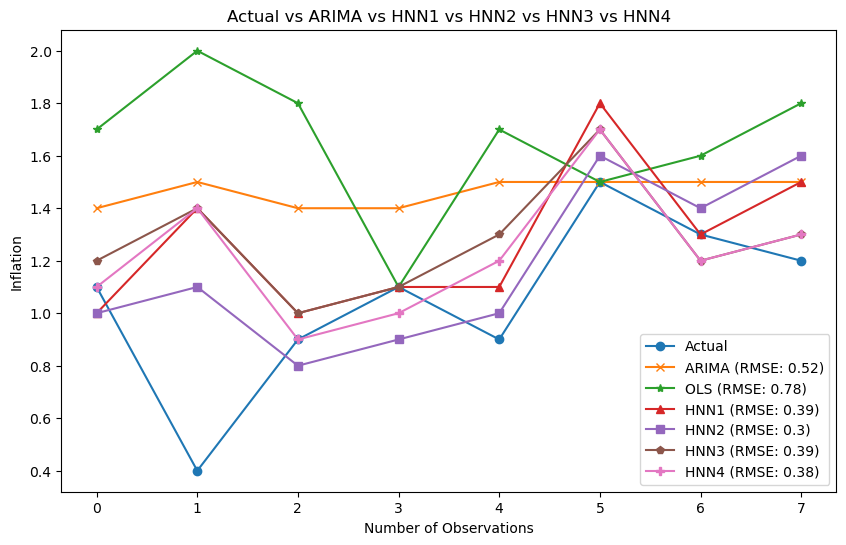

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(df['Actual'], label='Actual', marker='o')
plt.plot(df['ARIMA'], label=f'ARIMA (RMSE: {rmse_arima})', marker='x')
plt.plot(df['OLS'], label=f'OLS (RMSE: {rmse_ols})', marker='*')
plt.plot(df['HNN1'], label=f'HNN1 (RMSE: {rmse_hnn1})', marker='^')
plt.plot(df['HNN2'], label=f'HNN2 (RMSE: {rmse_hnn2})', marker='s')
plt.plot(df['HNN3'], label=f'HNN3 (RMSE: {rmse_hnn3})', marker='p')
plt.plot(df['HNN4'], label=f'HNN4 (RMSE: {rmse_hnn4})', marker='P')

plt.xlabel('Number of Observations')
plt.ylabel('Inflation')
plt.title('Actual vs ARIMA vs HNN1 vs HNN2 vs HNN3 vs HNN4')
plt.legend()

plt.show()